<a href="https://colab.research.google.com/github/ChristianConchari/Computer-Vision-Notes/blob/master/Tutorial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 3: Colour Thresholding
Welcome to the third tutorial! Before continuing with the second important image processing family: neighbourhood processing (aka. filtering), you will work with your actual knowledge about images, channels, and functions. We will be selecting areas of interests according to the colour. This method is known as Colour Thresholding and has a massive number of applications, including computer graphics and video. For instance, a common use is to select, separate, and exchange a green screen background to film videos with a different background.

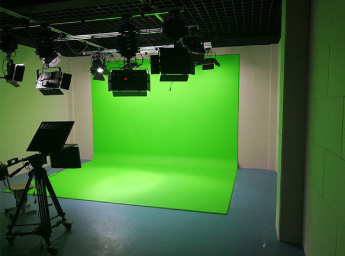

You will have two application examples first, and then, you will have to apply the method to a problem with your group. 

## 1. RGB colour space

### Import libraries

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [ ]:
# Read in the image
image = mpimg.imread('flag_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)


Image dimensions: (655, 800, 3)


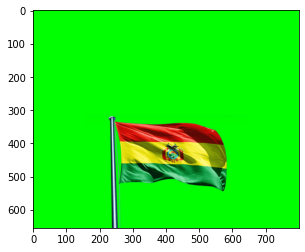

In [ ]:
# Display the image
plt.imshow(image)

### Define the color threshold

In [ ]:
# Define the color selection boundaries in RGB values
lower_green = np.array([0,240,0]) 
upper_green = np.array([180,255,180])

### Create a mask

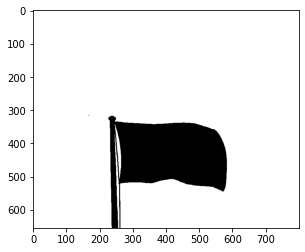

In [ ]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

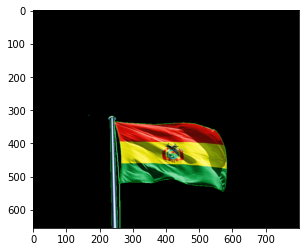

In [ ]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

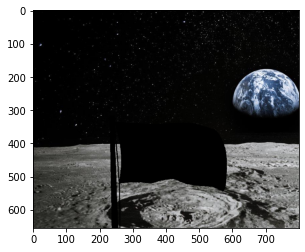

In [ ]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('moon_background.jpg')
# background_image = cv2.cvtColor(background_image,cv2.COLOR_BGR2RGB) (655, 800, 3)

background_image = background_image[0:655, 0:800]

masked_image2 = np.copy(background_image)

masked_image2[mask == 0] = [0, 0, 0]

plt.imshow(masked_image2)


### Create a complete image

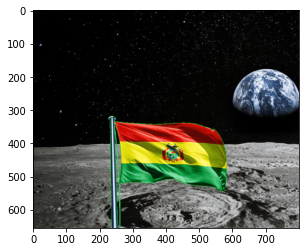

In [ ]:
## TODO: Add the two images together to create a complete image!
complete_image = masked_image + masked_image2

plt.imshow(complete_image)


## 2. HSV colour space

The colour thresholding method is quite useful when you have an image/video with complete-colour sections but it might have issues when you have to select sections with variable brightness, shadows, or colours. 

You've already seen that RGB images are formed of Red-Green-Blue combinations. Then, you can think of RGB as a *3D colour space* if we represent all possible values in a cartesian coordinate system for a three-dimensional space.  
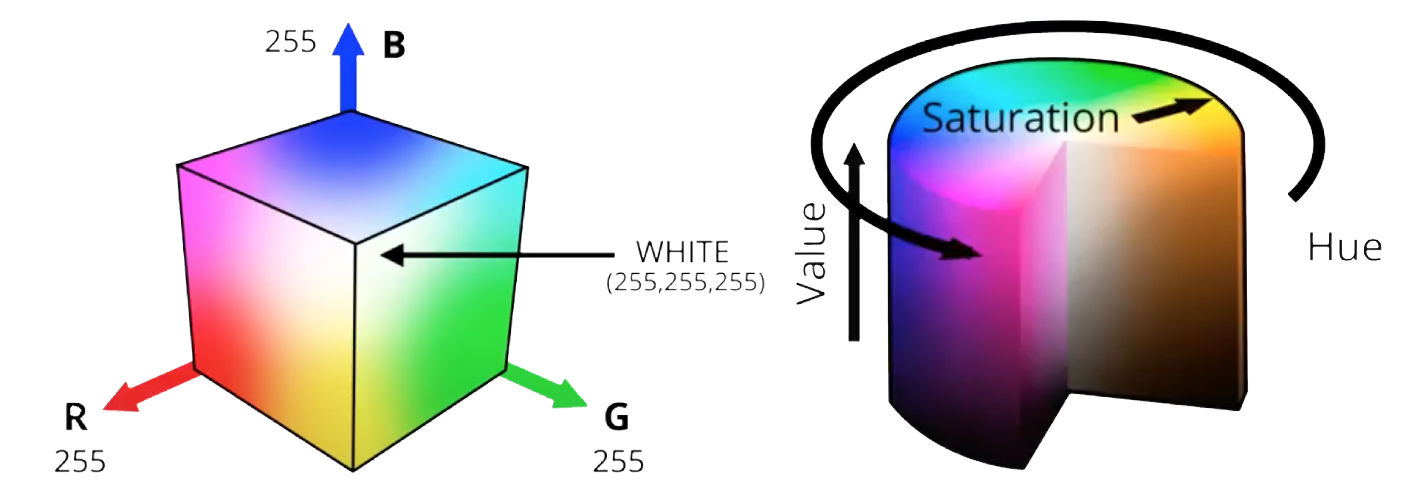

The HSV (Hue, Saturation, Value) is also a common colour space using in computer vision. This isolates the value (or V component) of each pixel in an image, and this is the component that varies the most under differnt lightning conditions. The H channel stays very consistent in shadow or excessive brightness so it would better help us find objects with variable colours than the RGB colour space. Let's make use of HSV to detect orange fish in seawater.  

### Import resources and display image

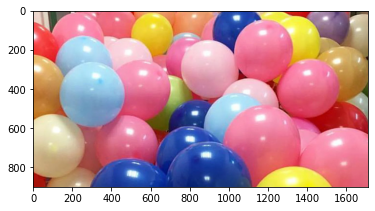

In [ ]:
# Read in the image
image = cv2.imread('globos-de-colores.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Plot colour channels

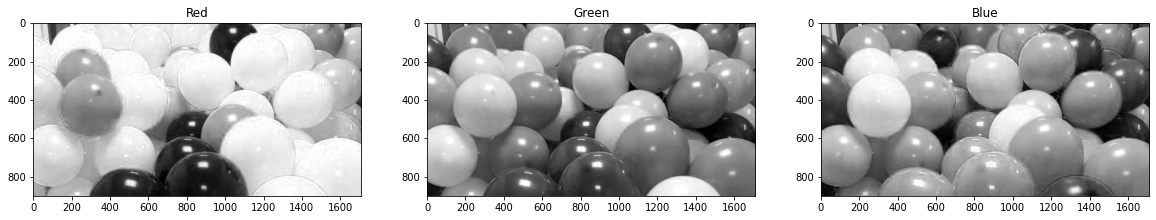

In [ ]:
# RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')

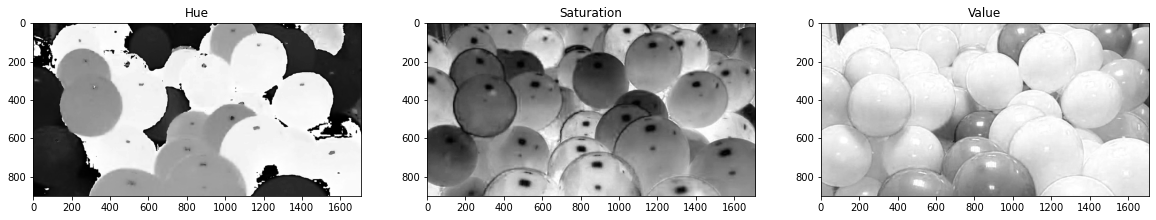

In [ ]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

### Mask the image in RGB

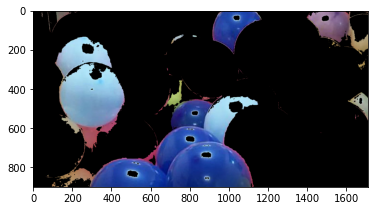

In [ ]:
# Define our color selection criteria in RGB values
lower_blue = np.array([0,0,80]) 
upper_blue = np.array([180,255,255])

# Define the masked area in RGB space
mask_rgb = cv2.inRange(image, lower_blue, upper_blue)

# mask the image
masked_image = np.copy(image)
masked_image[mask_rgb==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

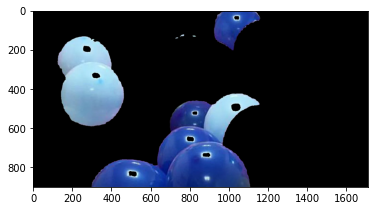

In [ ]:
# Define our color selection criteria in HSV values
lower_hue = np.array([80,40,40]) 
upper_hue = np.array([130,255,255])

# Now try HSV!
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Define the masked area in HSV space
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# mask the image
masked_image_hsv = np.copy(image)
masked_image_hsv[mask_hsv==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image_hsv)

## Exercise 1

Implement the *RGB colour space* section of this notebook by using *bitwise* functions of OpenCV. Use only one code cell. 

Image dimensions: 450 x 800 x 3


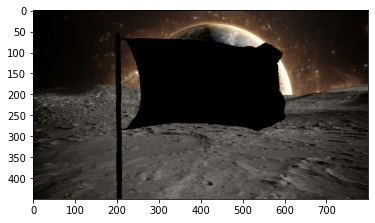

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

# Read in the image
image = mpimg.imread('flag_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
[rows, columns, depth]= image.shape
print(f'Image dimensions: {rows} x {columns} x {depth}')


# Define the color selection boundaries in RGB values
lower_green = np.array([0,240,0]) 
upper_green = np.array([180,255,180])

# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)
mask2 = cv2.bitwise_not(mask)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

# Mask the image to let the flag show through
aux_image = np.copy(image)
zeros_matrix = np.zeros_like(mask)

# Read the background image and resize it
background_image = mpimg.imread('moon_background.jpg')
background_image = cv2.cvtColor(background_image,cv2.COLOR_BGR2RGB) 
background_image = background_image[0:rows, 0:columns]

aux_background = np.copy(background_image)

# Computing mask wise operations 
masked_image = cv2.bitwise_and(aux_image, aux_image, mask=mask2)

masked_image2 = cv2.bitwise_and(aux_background, aux_background, mask=mask)

# Add both masked images to get the result

final_image = masked_image + masked_image2
# Display it!
plt.imshow(masked_image2, cmap="gray")





## Exercise 2
Imagine that you're given a set of landscape images as the following: 
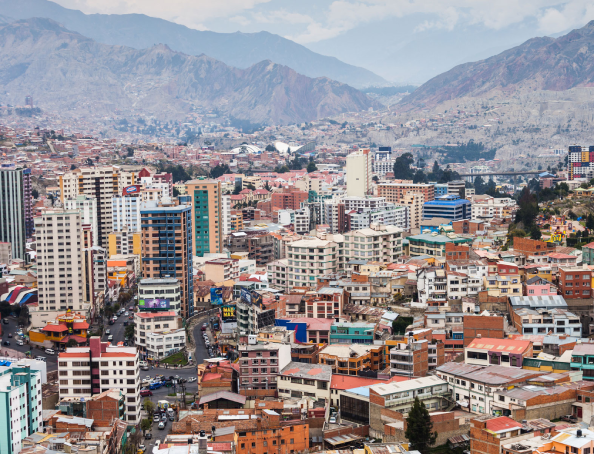

Implement a basic classifier to identify if an image was taken in the day or during the night. Then, test your classifier with several images. Given an image, your algorithm should display one of the short messages: "night" or "day". 

**Hint.** The third HSV channel contains the brightness value of every pixel in an image. 

SOLUTION:
----------

For resolving the challenge our algorithm will be trained with a set of data of 6 images at day and 6 images at night. In the first step, a comparison parameter will be found, then this parameter will define if an image corresponds to day or night.

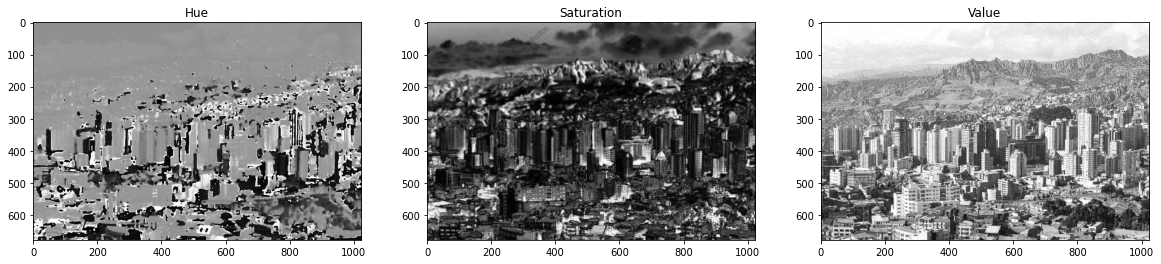

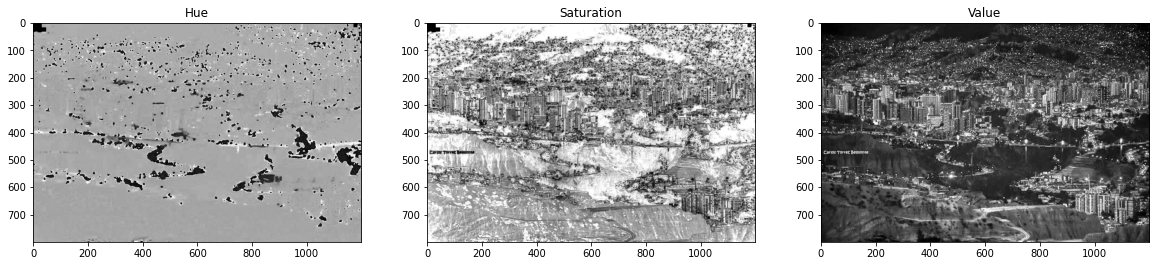

In [ ]:
# Read in the image
image1 = cv2.imread('training/landscape2.jpg')
image2 = cv2.imread('training/landscape_night2.jpg')


# Convert from BGR to RGB
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)


# Convert from RGB to HSV
hsv1 = cv2.cvtColor(image1 , cv2.COLOR_RGB2HSV)
hsv2 = cv2.cvtColor(image2, cv2.COLOR_RGB2HSV)


# HSV channels
h1 = hsv1[:,:,0]
s1 = hsv1[:,:,1]
v1 = hsv1[:,:,2]

h2 = hsv2[:,:,0]
s2 = hsv2[:,:,1]
v2 = hsv2[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h1, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s1, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v1, cmap='gray')


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h2, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s2, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v2, cmap='gray')

From the last images showed up we can notice than some of the most differencing parameters between day and night, is the Value channel, that appears to tend to 255 for day landscapes and tends to 0 for night landscapes.

Therefore our differencing parameter will depend of the V-channel values. For getting a parameter for each image we will get the average value around the image by adding all the pixels intensity and dividing it by its area.

In [ ]:
# Get the arrays size

[rows1, columns1] = v1.shape
[rows2, columns2] = v2.shape

# Get the areas

area1 = rows1*columns1
area2 = rows2*columns2

# Now we will find the brightness sum for images
sum_brightness1 = np.sum(hsv1[:,:,2])
sum_brightness2 = np.sum(hsv2[:,:,2])

# Get the average
avg1 = round(sum_brightness1/area1,2)
avg2 = round(sum_brightness2/area2,2)

# Print the result
print(f'For day the average value for the V-channel in day images is {avg1} and for night images {avg2}')


For day the average value for the V-channel in day images is 156.71 and for night images 76.71


We know that the Value channel contains the brightness information of the image, then this will be chosen to parametrize and compare the images.

In [ ]:
# Read in the image
images_d = []
images_n = []
images_d.append(cv2.imread('training/landscape.jpg'))
images_n.append(cv2.imread('training/landscape_night.jpg'))
images_d.append(cv2.imread('training/landscape2.jpg'))
images_n.append(cv2.imread('training/landscape_night2.jpg'))
images_d.append(cv2.imread('training/landscape3.jpg'))
images_n.append(cv2.imread('training/landscape_night3.jpg'))
images_d.append(cv2.imread('training/landscape4.jpg'))
images_n.append(cv2.imread('training/landscape_night4.jpg'))
images_d.append(cv2.imread('training/landscape5.jpg'))
images_n.append(cv2.imread('training/landscape_night5.jpg'))
images_d.append(cv2.imread('training/landscape6.jpg'))
images_n.append(cv2.imread('training/landscape_night6.jpg'))

# Convert from BGR to RGB
for i in range(5):
  images_d[i] = cv2.cvtColor(images_d[i], cv2.COLOR_BGR2RGB)

for i in range(5):
  images_n[i] = cv2.cvtColor(images_n[i], cv2.COLOR_BGR2RGB)


# Convert from RGB to HSV
hsv_d = []
hsv_n = []
for i in range(5):
  hsv_d.append(cv2.cvtColor(images_d[i], cv2.COLOR_RGB2HSV))

for i in range(5):
  hsv_n.append(cv2.cvtColor(images_n[i], cv2.COLOR_BGR2HSV))


# Find the average and append it to an array
avgd = []
avgn = []
for i in range(5):
  avgd.append(round(np.mean(hsv_d[i][:,:,2]),1))

for i in range(5):
  avgn.append(round(np.mean(hsv_n[i][:,:,2]),1))

# Show the average V-channel for day and night images
print(f'Average V-channel for day images training set: {avgd}')
print(f'Average V-channel for night images training set: {avgn}')


# We need the max value of the night V-channel array average
max_avg_brightness_night = np.amax(avgn)
min_avg_brightness_day = np.amin(avgd)
print('='*100)
print(f'The max brightness parameter at night for the training set is: {max_avg_brightness_night}')
print(f'The min brightness parameter at day for the training set is: {min_avg_brightness_day}')

#Finally an average from the max at night and the min at day will be the classifier parameter
p = round((max_avg_brightness_night+min_avg_brightness_day)/2,1)
print('='*100)
print(f'Our classifier parameter is: {p}')

Average V-channel for day images training set: [145.2, 156.7, 201.9, 157.1, 222.3]
Average V-channel for night images training set: [110.1, 76.7, 77.3, 80.6, 50.2]
The max brightness parameter at night for the training set is: 110.1
The min brightness parameter at day for the training set is: 145.2
Our classifier parameter is: 127.6


Now that we have the comparission parameter, we can classify images by doing the next parameters.


In [ ]:
img = cv2.imread('ruins_day.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
avg = round(np.mean(hsv[:,:,2]),1)

if avg > p:
  print('Its day at the image!')
else:
  print('Its night at the image!')


Its day at the image!


Once you complete both exercises, fill in the following form: https://forms.gle/f1LPFMD2u1LtjFJq7